# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
import seaborn as sns
from scipy import stats
medical = pd.read_csv('../Frequentist Case Study/insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

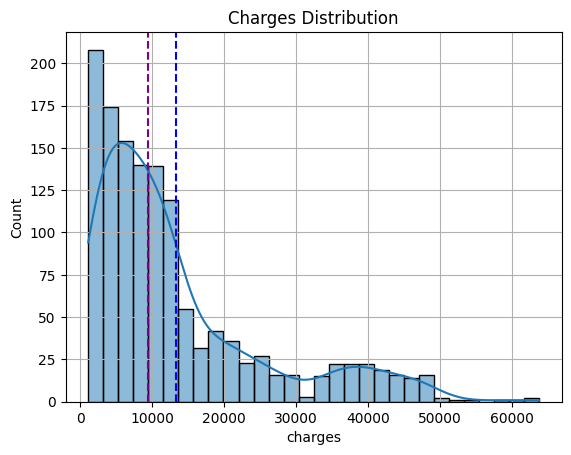

In [10]:
# Ploting a histogram of charges
ax = sns.histplot(x = medical['charges'], kde = True)
plt.axvline(np.mean(medical.charges), color='blue', linestyle='--')
plt.axvline(np.median(medical.charges), color='purple', linestyle='--')
ax.set_title('Charges Distribution')
plt.grid(True)

In [11]:
charges_mean = medical['charges'].mean()
print('Mean charges:',charges_mean)

charges_std = medical['charges'].std()
print('STD charges :',charges_std)

Mean charges: 13270.422265141257
STD charges : 12110.011236693996


Based on the preceding information, it's evident that the standard deviation (spread) of 12110.01 is considerable, and the distribution exhibits a right skew, indicating it's not normal.

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ Given the presumption that these data constitute a random sample of charges, we employ a t-statistic (due to the unknown population standard deviation) to assess the value 12,000. This involves computing a confidence interval around the true yet undisclosed mean (charge). Should the confidence interval of the mean encompass 12,000, it suggests cause for concern for the administrator.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ The suitable confidence interval to consider is the one-sided interval, specifically the lower bound. This choice stems from the administrator's apprehension that the true average charge may be below 12,000.

To establish a confidence interval of 95% for the mean utilizing the t-distribution:

1. - 1 - 0.95 = 0.05 
   - We only need one tail of the distributions: 
     - 0.05 / 2 = 0.025
   - 1 - 0.025 = 0.975
2. Degrees of freedom (df) = Number of samples (n) - 1 = len(medical.charges) - 1

#### The margin of error can be computed by first determining:

1. The critical value of the sample
2. The Standard Error of the sample

Then, the Margin of Error is obtained by multiplying the Critical value by the Standard Error.

To find the critical value of the sample:

####   Standard Error of the sample can be calculated using below:  

 
 $Standard Error of Sample = {\frac{𝜎 }{sqrt(n)}}$


In [12]:
# Calculate the critical t value:

ct_value = t.ppf( 0.975, df=len(medical.charges) - 1)
print("The Crtitical t Value: ", ct_value)

The Crtitical t Value:  1.961739888600845


In [16]:
# Calculate the Standard Error:

se = np.std(medical.charges) / (len(medical.charges) ** 0.5)
print("The Standard Error: ", se)

The Standard Error:  330.943713906084


In [17]:
# Calculate the Margin of Error:

me = ct_value * se
print("The Margin of Error: ", me)

The Margin of Error:  649.2254844512711


In [18]:
# Calculate the lower confidence interval:

print('The lower limit of the 95% confidence interval for the mean using the t-distribution is: ', 
      charges_mean - me)

The lower limit of the 95% confidence interval for the mean using the t-distribution is:  12621.196780689985


The administrator's concern is unwarranted, as the actual mean of 12,621.2 exceeds 12,000.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ Regarding the hypothesis tests:

- Null hypothesis: There is no difference in charges between people with insurance and those without insurance.
- Alternative hypothesis: People with insurance are charged differently compared to those without insurance.
- It is assumed that both groups have the same standard deviation.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [19]:
# Group the data by 'insuranceclaim' for 'charges' and generate a statistical summary of the results.

medical.groupby('insuranceclaim')['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
insuranceclaim,,,,,,,,
0,555.0,8821.421892,6446.510127,1121.8739,4445.337575,6933.24225,11424.211575,36910.60803
1,783.0,16423.928277,14045.928419,1131.5066,5733.288925,11538.42100,23484.788875,63770.42801


In [20]:
# Create two separate data frames, one for individuals with insurance and one for those without insurance.

insured = medical[medical['insuranceclaim'] == 1]
noninsured = medical[medical['insuranceclaim'] == 0]

In [21]:
# Calculate the mean for both groups (no: noninsured) and (ins: insurance):

no = np.mean(noninsured.charges)
ins = np.mean(insured.charges)

In [22]:
# Calculate the count for both groups (cno: noninsured) and (cins: insurance):

cno = len(noninsured)
cins = len(insured)

In [23]:
# The degrees of freedom are calculated based on the sizes of the samples from each of the two groups.

df = cno + cins - 2 
df

1336

In [24]:
# Calculate the Standard deviation for both groups (stdno: noninsured) and (stdins: insurance):

stdno = np.std(noninsured.charges, ddof = 1) 
stdins = np.std(insured.charges, ddof = 1)

In [25]:
# Compute the pooled standard deviation of the two groups manually

pooled_std = ((((cno - 1) * stdno **2) + ((cins - 1) * stdins ** 2))/( df )) ** 0.5
print("The pooled standard deviation of the two groups:", pooled_std)

The pooled standard deviation of the two groups: 11520.034268775256


In [26]:
# Calculate manually t-test statistic:

t_test = (no - ins)/((((1/cno) + (1/cins)) ** 0.5) * pooled_std)
t_test

-11.893299030876715

In [28]:
Critical_Value = t.ppf(0.025, df)
Critical_Value

-1.9617412190546961

As the t-test statistic (-11.89) is considerably lower than the critical t-value (-1.96), the resulting p-value will also be smaller than the critical t-value (-1.96). Consequently, we can infer that our findings are statistically significant, leading to the rejection of the null hypothesis, which posits that the mean charges for individuals with and without insurance are equal.

In [30]:
# Let's utilize the function from scipy.stats to verify our findings.

stats.ttest_ind(noninsured.charges, insured.charges)

TtestResult(statistic=-11.893299030876712, pvalue=4.461230231620717e-31, df=1336.0)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ Scipy.stats does not offer a function for conducting a z-test on a sample, as both samples must exhibit normal distribution for the test to be valid.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test